<center><font size = "10"> Week 5 - Single Cell Electrophysiology <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member1:
<br>Group member2:
<br>Group member3:
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional. Stimulation protocols to study various cell properties

<font size='3'>
Your task is to design and perform two different stimulation protocols that could be used to study the AP properties (e.g. amplitude, shape, rise-time, fall-time) and passive properties (e.g. input resistance and voltage base) of the cells you have in your group folder (.asc files). When defining the cells, for the passive properties use the parameters from tutorial 01 and for the active parameters use the MOD files used in tutorial 01. Don't include any biophysics on the cell axon.

<font size='3'>Run the protocols (saving the results to a csv file - you will need those for question 3), and plot soma voltages and the current applied. Explain the motivation behind your choice of protocols - why do you think these types of protocols are usefull when studying cell behavior?
    

# <font color= 'red'>Ex1:</font>. Analysing real single cell voltage traces from patch-clamp experiments

<font size='3'>Find the voltage base, firing frequency, spike count and after-hiperpolarization depth (AHP-depth) from the recordings that you can find in your folder group (.dat files). Extract the asked features from the one or several stimulation protocols that you think you can extract the features from.

<font size='3'>You can compute it as you wish, using eFEL, scipy.signal  or creating your own functions. <font color= 'red'>[1.5 pts]

#### Traces description

* The files are named with: stimuli type (e.g. "APWaveform", "FirePattern", "IV"). 
* Sweep (repetition) number: (e.g. "APWaveform_46-51"), of increasing/decreasing amplitudes.
* Note that we have pairs of recordings with the same trace number (e.g. "exp_APWaveform_ch7_51.dat" and "exp_APWaveform_ch6_51.dat"). One of them contains the current stimulus (in this case "*ch7*") and the other the voltage response (in this case "*ch6*").
    


# <font color= 'red'>Ex2:</font> Combine Ex 1 and Ex 2

<font size='3'> Now let's do some electrophysiological analysis on both cells from your group folder that you have used in exercise 1. Examine your plots for the two protocols you have defined and select 2 or 3 eFeatures to help you identify differences between your two cells. Would you be able to classify the cells based on these eFeatures ? Explain your choice of features and your observations. <font color= 'red'>[2.5 pts]    
 

# <font color= 'red'>Ex3:</font> Genetic Algorith (Optimisation)

<font size='3'>Change the GA code in such a way that instead of the Spikecount feature, we search for a solution with AP amplitude of 96 for stim_amp = 0.5 nA and AP amplitdue of 85 for stim_amp = 0.05 nA.
    
<font size='3'>As you can see the optimisation algoithm explained in the tutorial is very simple and gives a lot of possible solutions. Explain and demonstrate how can you modify the GA optimisation to better contrain the returned solution. <font color= 'red'>[2 pts]
    

All the modifications are indicated and explained in the comments within the code. 

In [1]:
# Load usefull packages
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from neuron import h

In [2]:
# Load usefull packages
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from neuron import h

# Cretae ball and stick model
# Create sections
soma = h.Section(name='soma')
dend = h.Section(name='dend')

# Topology
dend.connect(soma(1))
# Geometry
soma.L = soma.diam = 12.6157 # microns
dend.L = 200                 # microns
dend.diam = 1                # microns
h.define_shape() # Translate into 3D points.

# Biophysics
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
# Now we won't include the values for gkbar and gnabar
soma.insert('hh')
for seg in soma:
    #seg.hh.gnabar = 0.25  # Sodium conductance in S/cm2. [0, 1]
    #seg.hh.gkbar = 0.1  # Potassium conductance in S/cm2. [0, 1]
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2
    seg.pas.e = -65    # Leak reversal potential mV

I = 0.5 nA
{'AP_amplitude': array([96.64694314, 31.58787383]), 'Spikecount': array([2])}
[96.64694314 31.58787383]
I = 0.05 nA
{'AP_amplitude': array([85.01530736]), 'Spikecount': array([1])}
[85.01530736]


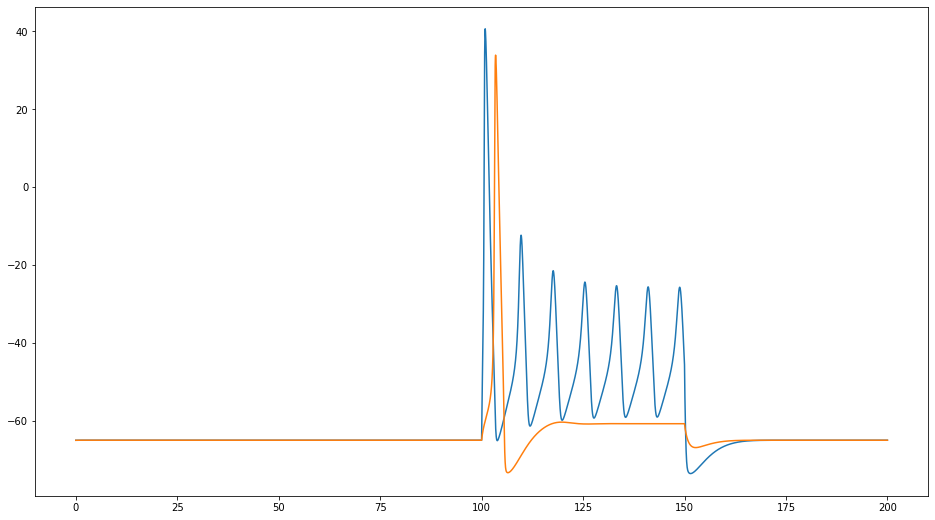

gna = 0.12
gk  = 0.036


In [3]:
import efel
# Create a function of the simulation that will give us the result for the different population members
def stimulation(amp):
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [200]}

    feature_values = efel.getFeatureValues([trace], ['AP_amplitude','Spikecount'])[0] #CHANGED THE CODE HERE: Feature of interest

    
    return feature_values, rec_t, rec_v_soma

# RUN to test
plt.figure(figsize = (16,9));
print("I = 0.5 nA")
feat,rec_t,rec_v1 = stimulation(0.5)
print(feat)
print(feat['AP_amplitude'])
plt.plot(rec_t,rec_v1,label = "I = 0.5 nA")
print("I = 0.05 nA")
feat,rec_t,rec_v2 = stimulation(0.05)
print(feat)
print(feat['AP_amplitude'])
plt.plot(rec_t,rec_v2,label = "I = 0.05 nA")


plt.show()

print("gna =",soma(0.5).hh.gnabar)
print("gk  =",soma(0.5).hh.gkbar)

<font size='3'> Interestingly, we found that the default values for gnabar ad gkbar produce the requested action potential amplitudes. Let's see if we can find the same values using a genetic algorithm

In [4]:
# Function to create a random set (population) of gk and gna values
import random
import numpy as np
import efel

def create_starting_population(gna_min, gna_max, gk_min, gk_max, pop_size):
    # Set up an initial array of all zeros
    population = np.zeros((pop_size, 2))
    for p in range(pop_size):
        gna = random.uniform(gna_min, gna_max)
        gk = random.uniform(gk_min, gk_max)
        population[p][0] = gna
        population[p][1] = gk
    return population

# RUN to test
gna_min = 0
gna_max = 1
gk_min = 0
gk_max = 1
pop_size = 10

pop = create_starting_population(gna_min, gna_max, gk_min, gk_max, pop_size)
print (pop)

[[0.95554636 0.73596115]
 [0.14671166 0.13480911]
 [0.9234213  0.57434369]
 [0.09769763 0.55426528]
 [0.46158592 0.22257567]
 [0.26746881 0.49750446]
 [0.17095392 0.97079164]
 [0.1347018  0.48332889]
 [0.89472873 0.94425428]
 [0.63136062 0.94260584]]


gna = 0.24
gk  = 0.23
{'AP_amplitude': array([97.61312934]), 'Spikecount': array([1])}
No AP: [0.24, 0.23]
Goal: 85 mV 
Stimulus: 0.05 nA
fit =  1.0
{'AP_amplitude': None, 'Spikecount': array([0])}


gna = 0.16
gk  = 0.06
{'AP_amplitude': array([97.76490961, 41.49525957, 32.23002962, 28.29517448, 27.46505667,
       27.26818322]), 'Spikecount': array([6])}
{'AP_amplitude': array([86.34391941]), 'Spikecount': array([1])}


gna = 0.81
gk  = 0.61
{'AP_amplitude': array([105.84949969]), 'Spikecount': array([1])}


/home/martim/.local/lib/python3.7/site-packages/efel/api.py:502: RuntimeWarning: Error while calculating feature AP_amplitude: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [peak_voltage] is missing
AP_amplitude: Error calculating peak_voltage
  RuntimeWarning)
/home/martim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


No AP: [0.81, 0.61]
Goal: 85 mV 
Stimulus: 0.05 nA
fit =  1.0
{'AP_amplitude': None, 'Spikecount': array([0])}


gna = 0.284
gk  = 0.248
{'AP_amplitude': array([99.54616391]), 'Spikecount': array([1])}
No AP: [0.284, 0.248]
Goal: 85 mV 
Stimulus: 0.05 nA
fit =  1.0
{'AP_amplitude': None, 'Spikecount': array([0])}


[0.5084017153033648, 0.01709764584025593, 0.5512994775311483, 0.5184696036914612]


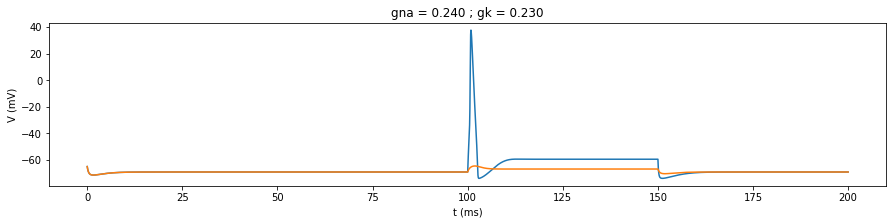

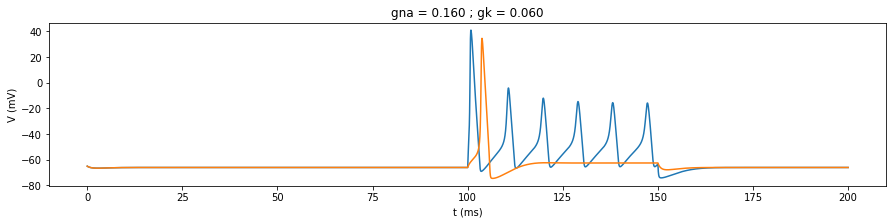

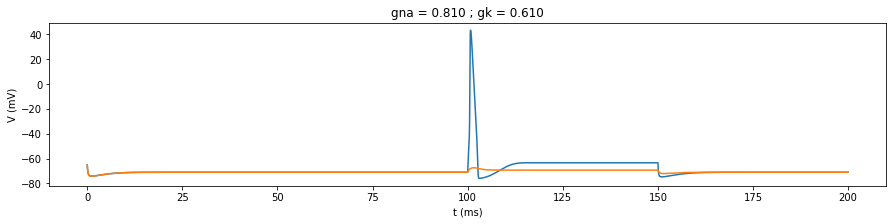

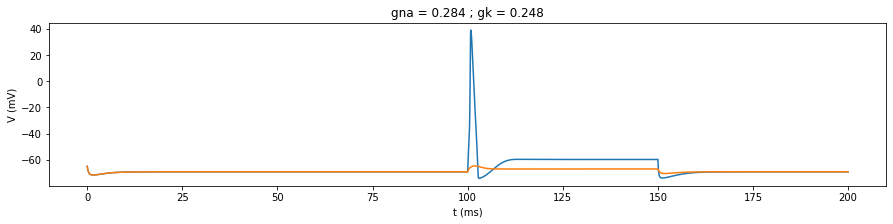

In [5]:
#Function to calculate fitness 



def calculate_fitness(population, goal_stim ,debug = False): 
    #changed this to allow for a list of lists containing an arbitrary number of goals and stimulation amplitudes
    scores = []
    for pop in population:
        gna = pop[0]
        gk = pop[1]
        # Introduce mechanisms in the ball and stick model
        soma.insert('hh')
        for seg in soma:
            seg.hh.gnabar = gna  # Sodium conductance in S/cm2. [0, 1]
            seg.hh.gkbar = gk  # Potassium conductance in S/cm2. [0, 1]

        fits = []
        if debug == True :
            print("gna =",soma(0.5).hh.gnabar)
            print("gk  =",soma(0.5).hh.gkbar)
            fig1, ax1 = plt.subplots(figsize=(15,3))
            ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')
            title = 'gna = {:.3f} ; gk = {:.3f}'.format(gna ,gk )
            ax1.set_title(title)
        for g, st in zip(goal_stim[0], goal_stim[1]):
            
            feat,rec_t ,rec_v = stimulation(st)
            value = 0;

            if feat['AP_amplitude'] is not None :
                if(len(feat['AP_amplitude'])):
                    value = feat['AP_amplitude'][0] #Feature we are interested to optimize the parameters uppon

            
            #Calculate the finess in realtive units so that the deviations can be compared
            fit = np.abs((g - value)/g) #The lower the fitness the better are the values of gk and gna since 
            fits.append(fit)        # as the value of the AP amplitude is closer to the goal value4
            
            #print(feat)
            if debug == True:
                if feat['AP_amplitude'] is None:
                    print("No AP:",pop);
                    print("Goal: %i mV \nStimulus: %.2f nA"%(g,st))
                    print("fit = ",fit);
                
                
                ax1.plot(rec_t,rec_v)            
            
            if debug == True :
                print(feat)
        if debug == True:
                fig1.show()
                print('\n')
        del feat      
        scores.append(np.mean(fits))
        
    return scores



# RUN to test
stim_amp1 = 0.5 # nA
goal1 = 96 # spike count number
stim_amp2 = 0.05 # nA
goal2 = 85 # spike count number

goal_stim = [[goal1,goal2],[stim_amp1,stim_amp2]]
pop_test = [[0.24, 0.23],[0.16, 0.06],[0.81, 0.61],[.284,.248]]

fit_scor_test = calculate_fitness(pop_test, goal_stim,debug = 1)
print(fit_scor_test)

In [6]:
#Select the fittest individuals
#Changed the code to allow for competition between multiple individuals at once
def select_individual_by_tournament(population, scores, n_individuals = 2):
    # Get population size    
    population_size = len(scores);
    fighters = random.sample(range(population_size),n_individuals);
    #print(fighters)
    #fighter_scores = [scores[i] for i in fighters]
    #print(fighter_scores)
    winner = fighters[0]
    for f in fighters:
        if scores[f] < scores[winner]:
            winner = f;   
    #Return winner
    #print(winner)
    return population[winner, :]

# RUN to test
print(pop)
fit_scor = calculate_fitness(pop, goal_stim)
for s in fit_scor:
    print(s)

parent1 = select_individual_by_tournament(pop, fit_scor,3)
parent2 = select_individual_by_tournament(pop, fit_scor,3)
print(parent1)
print(parent2)


[[0.95554636 0.73596115]
 [0.14671166 0.13480911]
 [0.9234213  0.57434369]
 [0.09769763 0.55426528]
 [0.46158592 0.22257567]
 [0.26746881 0.49750446]
 [0.17095392 0.97079164]
 [0.1347018  0.48332889]
 [0.89472873 0.94425428]
 [0.63136062 0.94260584]]
0.5548507727301547
0.5084709404118435
0.5575709020389451
0.6866725107860899
0.5398059857701487
0.5102804837719481
0.6544126687867381
0.59783284133519
0.5519408867267952
0.5313743425393598
[0.46158592 0.22257567]
[0.63136062 0.94260584]


In [7]:
#Breeding
def breed_by_crossover(parent_1, parent_2):
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0],parent_2[1]))  
    child_2 = np.hstack((parent_1[1],parent_2[0]))    
    # Return children
    return child_1, child_2

child1, child2 = breed_by_crossover(parent1, parent2)


print (child1)
print (child2)


[0.46158592 0.94260584]
[0.22257567 0.63136062]


In [8]:
#Random mutations
def randomly_mutate_population(population, mutation_probability,option="random"):  
    for p in population:
        filt = random.random()
        if filt < mutation_probability:
            #print("RAND MUTATION")
            # Apply random mutation
            gna = random.uniform(0, 1)
            p[0] = gna
            gk = random.uniform(0, 1)
            p[1] = gk
        else:
            pass
    # Return mutation population
    return population

#Added a new kind of mutation to explore, in a controlled way, smaller variations in the parameters.

def increment_mutate_population(population, mutation_probability,inc):  
    for p in population:
        filt = random.random()
        if filt < mutation_probability:
            #print("INC MUTATION")
            #Apply increment mutation 
            #Increment between -inc and +inc. 
            r1 = random.uniform(-1,1)* inc;
            r2 = random.uniform(-1,1)* inc;
            #Conductance is increased by a value between -inc and +inc
            gna = p[0] + r1;
            gk  = p[1] + r2; 
            if gna > 0 and gna < 1:
                p[0] = gna;
            if gk > 0 and gk < 1:
                p[1] = gk;
        else:
            pass
    # Return mutation population
    return population


new_pop = np.stack((child1, child2))
print (new_pop)

mut_pop = randomly_mutate_population(new_pop, 0.25)
print (mut_pop)

[[0.46158592 0.94260584]
 [0.22257567 0.63136062]]
[[0.46158592 0.94260584]
 [0.22257567 0.63136062]]


In [9]:
#Function running the GA for a number of trials n_trial. 
#In each trial, maximum_generation generations are computed with a population size of population_size
#At the end of each trial the [gna, gk] pair with the best score over all the generations is stored
def run_GA(goal_stim, n_trials = 5, maximum_generation = 5,population_size = 20):
    
    best_conductances = [];
    all_time_best_scores = [];
    gna_min = 0.0
    gna_max = 1.0
    gk_min = 0.0
    gk_max = 1.0
    
    n_individuals = 3; #number of individuals in each tournament
    rand_mutation_rate = 0.02
    inc_mutation_rate = 1.# ensure a little bit of variability always
    inc = 0.02 # increment for increment mutations

    for trial in range(n_trials):
        print("TRIAL ",trial)
        best_score_progress = [] # Tracks progress
        # Create starting population
        # RUN
        population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)
       
        # Display best score in starting population
        fit_scores = []
        fit_scores = calculate_fitness(population, goal_stim)
        best_score = np.min(fit_scores)
        trial_best_score = best_score;
        trial_best_conductances = [];
        #print(fit_scores)
        for i in range(len(fit_scores)):
            if fit_scores[i] == best_score:
                print(i)
                gna = population[i][0]
                gk = population[i][1]
                print ('Starting best score: %.3f (gna = %.3f, gk = %.3f)' %(best_score, gna, gk))
                best_score_progress.append(best_score)
                trial_best_conductances = [gna, gk]
                break

        # Now we'll go through the generations of genetic algorithm
        for generation in range(maximum_generation):
            # Create an empty list for new population
            new_population = []

            # Create new popualtion generating two children at a time
            for i in range(int(population_size/2)):
                parent_1 = select_individual_by_tournament(population, fit_scores,n_individuals)
                parent_2 = select_individual_by_tournament(population, fit_scores,n_individuals)
                child_1, child_2 = breed_by_crossover(parent_1, parent_2)
                new_population.append(child_1)
                new_population.append(child_2)


            # Replace the old population with the new one
            population = np.array(new_population)
            
            # Apply mutation
            population = randomly_mutate_population(population, rand_mutation_rate)
            population = increment_mutate_population(population,inc_mutation_rate,inc)

            # Score best solution, and add to tracker
            fit_scores = calculate_fitness(population, goal_stim)
            best_score = np.min(fit_scores)

            #print(fit_scores)
            for i in range(len(fit_scores)):
                if fit_scores[i] == best_score:
                    #print(i)
                    gna = population[i][0]
                    gk = population[i][1]
                    print ('Generation %s best score: %.3f (gna = %.3f, gk = %.3f)' %(generation+1, best_score, gna, gk))
                    best_score_progress.append(best_score)
                    if best_score < trial_best_score:
                        trial_best_score = best_score # update the best score in this trial
                        trial_best_conductances = [gna, gk];
                    break

        # GA has completed required generation
        all_time_best_scores.append(trial_best_score)
        best_conductances.append(trial_best_conductances)
        # Plot progress
        plt.plot(best_score_progress)
        plt.xlabel('Generation')
        plt.ylabel('Best score (% target)')
        plt.show()

    fig = plt.figure(figsize=(19, 9), dpi=80)
    plt.plot(all_time_best_scores)
    plt.xlabel('Trial')
    plt.ylabel('Best score (% target)')
    plt.show()    
    
    return all_time_best_scores,best_conductances

TRIAL  0
[0.5388134240903609, 0.509362589738546, 0.5315737913297488, 0.5576191896914441, 0.5478795328488258, 0.6984937883618623, 0.5369062056962036, 0.596966142842106, 0.553162248535033, 1.0, 0.19271928148739115, 0.5542625683070354, 0.5519000160278212, 0.5385657654671684, 0.5807961246358526, 0.1695689631926479, 0.17381985110433215, 0.5577101698497847, 0.14422465019683262, 0.5528590234808431]
18
Starting best score: 0.144 (gna = 0.875, gk = 0.114)
Generation 1 best score: 0.065 (gna = 0.259, gk = 0.107)


/home/martim/.local/lib/python3.7/site-packages/efel/api.py:502: RuntimeWarning: Error while calculating feature AP_amplitude: AP_amplitude: Error calculating AP_begin_indicies
  RuntimeWarning)


Generation 2 best score: 0.125 (gna = 0.863, gk = 0.099)
Generation 3 best score: 0.051 (gna = 0.230, gk = 0.096)
Generation 4 best score: 0.130 (gna = 0.434, gk = 0.111)
Generation 5 best score: 0.099 (gna = 0.321, gk = 0.104)


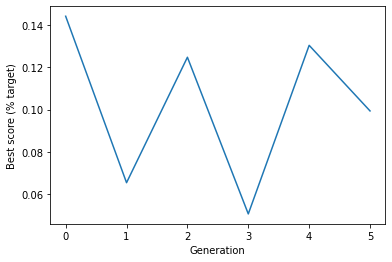

TRIAL  1
[0.16138638081392645, 0.5178207035206509, 0.1662620604140183, 0.5374202300955874, 0.14804132454820584, 1.0, 0.5529831197794729, 0.5553794706017516, 0.5146385119473428, 0.12686807867837524, 0.543179762627738, 0.6636080339504177, 1.0, 0.5603187014181383, 1.0, 0.5244142775810109, 0.5482529325586668, 0.540324222281536, 0.11670752694126062, 0.5059564806075323]
18
Starting best score: 0.117 (gna = 0.805, gk = 0.103)
Generation 1 best score: 0.114 (gna = 0.320, gk = 0.072)
Generation 2 best score: 0.117 (gna = 0.292, gk = 0.052)
Generation 3 best score: 0.069 (gna = 0.284, gk = 0.122)


/home/martim/.local/lib/python3.7/site-packages/efel/api.py:502: RuntimeWarning: Error while calculating feature AP_amplitude: AP_amplitude: More peak_voltage entries during the stimulus than AP_begin_indices entries
  RuntimeWarning)


Generation 4 best score: 0.111 (gna = 0.272, gk = 0.047)
Generation 5 best score: 0.066 (gna = 0.267, gk = 0.112)


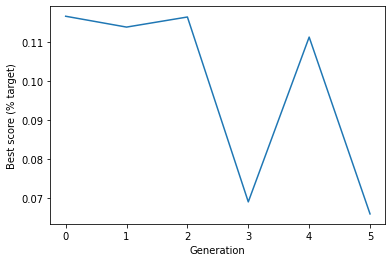

TRIAL  2
[0.7012415546161562, 0.5525404478981568, 0.6521269104142744, 0.17083688890416185, 0.5395703121115093, 0.15787716773405436, 0.5517587037095951, 0.6908604461824442, 0.5429063147091556, 0.1945875671282326, 0.5522751226975454, 0.5241971975024465, 0.525605115865092, 0.1718774147229677, 0.5164319936003466, 0.5882359242019574, 0.5340919279486566, 1.0, 0.5523987414583237, 0.5382285929394315]
5
Starting best score: 0.158 (gna = 0.641, gk = 0.139)
Generation 1 best score: 0.119 (gna = 0.322, gk = 0.048)
Generation 2 best score: 0.144 (gna = 0.461, gk = 0.102)
Generation 3 best score: 0.141 (gna = 0.436, gk = 0.086)
Generation 4 best score: 0.096 (gna = 0.290, gk = 0.091)
Generation 5 best score: 0.098 (gna = 0.274, gk = 0.076)


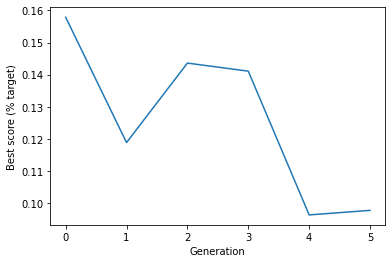

TRIAL  3
[0.5549086447523734, 0.16998865238608074, 0.5456722651778317, 0.5554563662198674, 0.14905141122509885, 0.5493846219340592, 0.09977713083484899, 0.5615237463460019, 0.1753979593607416, 1.0, 0.5474708590217084, 0.1683980773568689, 0.5803321630040034, 0.10413030013521245, 0.11885529271335023, 0.17766835732319977, 0.550790743747798, 0.5571907906670449, 0.6111677948447768, 0.16235518638279053]
6
Starting best score: 0.100 (gna = 0.240, gk = 0.015)
Generation 1 best score: 0.078 (gna = 0.252, gk = 0.023)
Generation 2 best score: 0.078 (gna = 0.270, gk = 0.103)
Generation 3 best score: 0.105 (gna = 0.260, gk = 0.041)
Generation 4 best score: 0.115 (gna = 0.285, gk = 0.040)
Generation 5 best score: 0.078 (gna = 0.232, gk = 0.078)


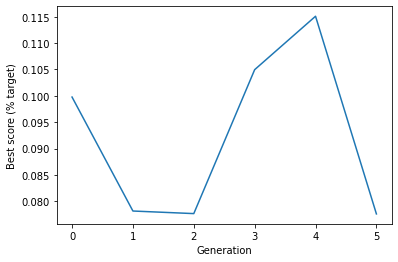

TRIAL  4
[0.6124169050651967, 0.5588443543170772, 0.7512053001442296, 0.5516468097405024, 0.617631127674987, 0.5308177100320535, 0.5418417816603688, 0.6329510340732413, 0.5527558205189754, 0.552877651954735, 0.5311053589372176, 0.5250385898802935, 1.0, 1.0, 0.5380670712775911, 0.5536047736191813, 0.5220112583009429, 0.19461838838560047, 1.0, 1.0]
17
Starting best score: 0.195 (gna = 0.849, gk = 0.068)
Generation 1 best score: 0.108 (gna = 0.279, gk = 0.051)
Generation 2 best score: 0.030 (gna = 0.164, gk = 0.059)
Generation 3 best score: 0.116 (gna = 0.442, gk = 0.167)
Generation 4 best score: 0.133 (gna = 0.483, gk = 0.159)
Generation 5 best score: 0.124 (gna = 0.469, gk = 0.168)


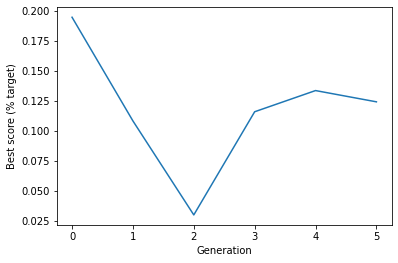

TRIAL  5
[0.5577112583987885, 0.5444720755781076, 0.15008760013912376, 0.5226074853549535, 0.612835819399692, 0.16362582260773426, 0.1540245957592244, 0.6902067775289017, 0.5523540376524944, 0.5521549530793388, 0.5009387324070397, 0.5385629714037957, 0.17188441554324124, 0.5383721384401805, 0.5533701875409552, 0.11488154708092987, 0.5017688954701404, 0.5181384203551028, 0.5510175026192238, 1.0]
15
Starting best score: 0.115 (gna = 0.338, gk = 0.083)
Generation 1 best score: 0.107 (gna = 0.711, gk = 0.074)
Generation 2 best score: 0.122 (gna = 0.345, gk = 0.066)
Generation 3 best score: 0.124 (gna = 0.985, gk = 0.095)
Generation 4 best score: 0.121 (gna = 0.910, gk = 0.084)
Generation 5 best score: 0.125 (gna = 0.951, gk = 0.099)


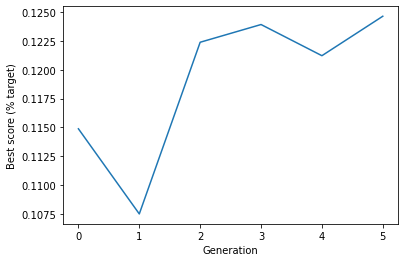

TRIAL  6
[0.17687914822713297, 0.5589392344095568, 1.0, 0.1470438998222996, 0.5568317606016525, 0.5371959752168632, 0.16747211626430838, 0.5552182738727262, 0.5206854399588808, 0.15977227485505247, 0.507978040376445, 1.0, 0.18160444814434232, 0.544721357913206, 0.5397622307070575, 0.5594123203508642, 0.5153453647633872, 0.5308875383761996, 0.5401816708426767, 0.5245990002130253]
3
Starting best score: 0.147 (gna = 0.568, gk = 0.163)
Generation 1 best score: 0.033 (gna = 0.238, gk = 0.108)
Generation 2 best score: 0.047 (gna = 0.179, gk = 0.058)
Generation 3 best score: 0.060 (gna = 0.243, gk = 0.098)
Generation 4 best score: 0.033 (gna = 0.253, gk = 0.115)
Generation 5 best score: 0.051 (gna = 0.248, gk = 0.109)


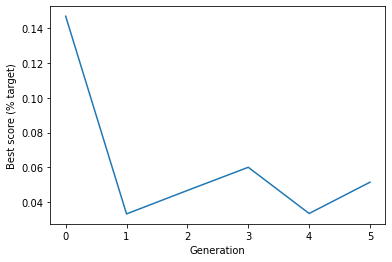

TRIAL  7
[0.5534998576308711, 0.5367125368389724, 0.5223544884332879, 0.5415589488367117, 0.5530129942509785, 0.5718877517613172, 0.5588850522569728, 0.5461967151323365, 0.5368436215355601, 0.5501926072038201, 0.5527075134609648, 0.029853154349144876, 0.510040870903906, 0.5497901471484341, 0.5212267405290836, 0.15674202897953374, 1.0, 0.5514021077670194, 0.7236515198929554, 0.54115398343445]
11
Starting best score: 0.030 (gna = 0.097, gk = 0.008)
Generation 1 best score: 0.085 (gna = 0.296, gk = 0.018)
Generation 2 best score: 0.106 (gna = 0.291, gk = 0.070)
Generation 3 best score: 0.099 (gna = 0.267, gk = 0.028)
Generation 4 best score: 0.104 (gna = 0.247, gk = 0.040)
Generation 5 best score: 0.096 (gna = 0.261, gk = 0.067)


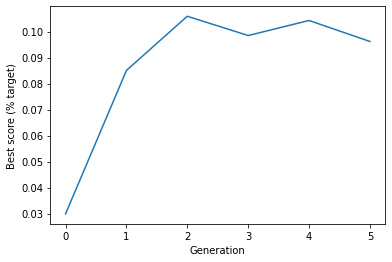

TRIAL  8
[0.5313446549329827, 0.5433174034243938, 0.5278726727158491, 0.15300969543639587, 0.5521157019193538, 0.5423309696284432, 0.5364008492359016, 1.0, 1.0, 0.5432763172488225, 0.006436585497642879, 0.5334977695314705, 0.5389365236683425, 0.10583417682562349, 1.0, 0.5255091643727002, 0.1711025708682207, 0.5510490056991203, 0.5373285228408601, 0.555933374532194]
10
Starting best score: 0.006 (gna = 0.138, gk = 0.050)
Generation 1 best score: 0.061 (gna = 0.114, gk = 0.005)
Generation 2 best score: 0.109 (gna = 0.285, gk = 0.052)
Generation 3 best score: 0.022 (gna = 0.154, gk = 0.068)
Generation 4 best score: 0.055 (gna = 0.171, gk = 0.048)
Generation 5 best score: 0.016 (gna = 0.133, gk = 0.052)


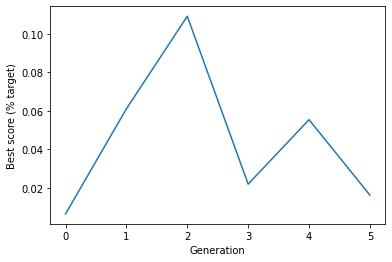

TRIAL  9
[0.5214497643397474, 0.5400444861909316, 0.5322359948826617, 0.5490490810830799, 0.5546334055180303, 0.5590451406832623, 0.5862943578730759, 0.5242552243025488, 0.5536490083293798, 0.5481626650592459, 0.5249253743523232, 0.5139813782515045, 0.548175740417079, 0.5997640252120452, 0.05948440607441527, 0.54277827832825, 0.13076934813966493, 0.10538208314025453, 0.5495670452284566, 0.5508047469991956]
14
Starting best score: 0.059 (gna = 0.144, gk = 0.018)
Generation 1 best score: 0.059 (gna = 0.143, gk = 0.021)
Generation 2 best score: 0.104 (gna = 0.515, gk = 0.024)
Generation 3 best score: 0.135 (gna = 0.853, gk = 0.034)
Generation 4 best score: 0.134 (gna = 0.436, gk = 0.106)
Generation 5 best score: 0.128 (gna = 0.442, gk = 0.130)


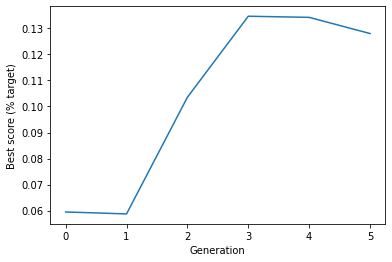

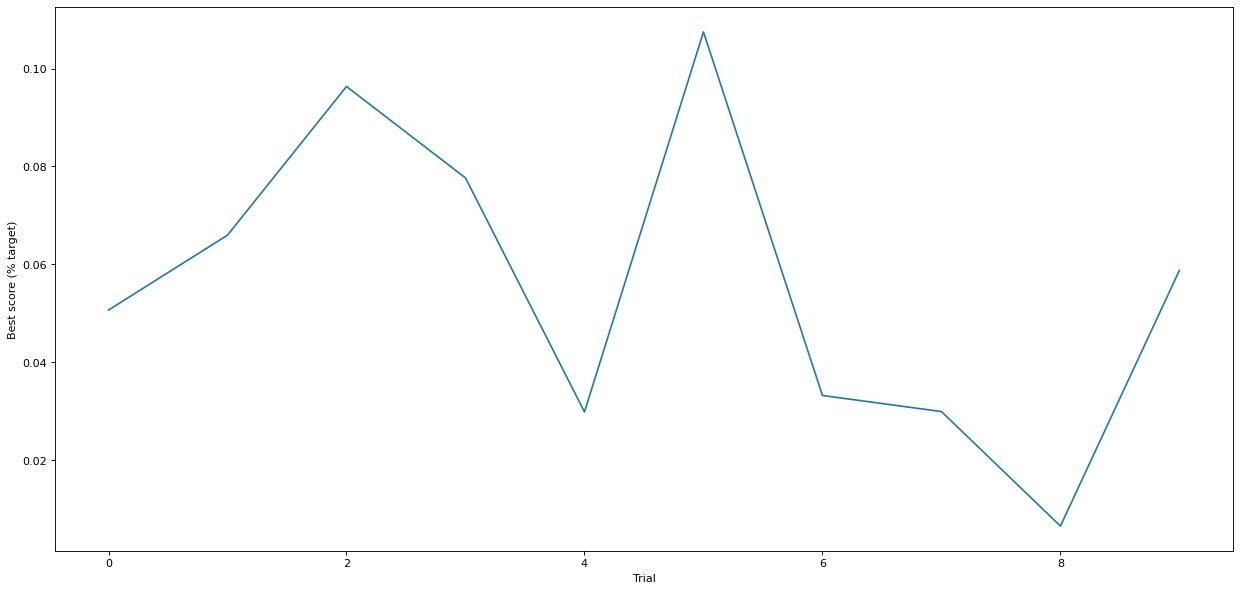

In [10]:
stim_amp1 = 0.5 # nA
goal1 = 96 # AP_amp of 96 mV is our goal
stim_amp2 = 0.05 # nA
goal2 = 85 # AP_amp of 85 mV is our goal
#List of Lists containing goals and stimuli
goal_stim = [[goal1, goal2], [stim_amp1, stim_amp2]]

scores, gs = run_GA(goal_stim,n_trials = 10)

In [11]:
print(scores)
print(gs)

[0.050607858187500514, 0.06593043731421049, 0.09632984048760658, 0.07763107081441145, 0.029781789781913745, 0.1074931880633606, 0.03313908438238393, 0.029853154349144876, 0.006436585497642879, 0.05873387831916039]
[[0.22955548693286953, 0.09617187001761549], [0.266757102350496, 0.11152233778808676], [0.2901009178020126, 0.09136175101776786], [0.2319562991177375, 0.07760033205985353], [0.16397832813345314, 0.05859316811363578], [0.7105802708096971, 0.0743278778225317], [0.23840282118414932, 0.10824055197754757], [0.0965611599018843, 0.008164184181554845], [0.13758870633618758, 0.05013175428770589], [0.1432715157528631, 0.021160303511157524]]


gna = 0.22955548693286953
gk  = 0.09617187001761549
{'AP_amplitude': array([100.40899259,  53.75836763,  46.82666593,  44.37046818,
        44.19142115]), 'Spikecount': array([5])}
{'AP_amplitude': array([89.69954037]), 'Spikecount': array([1])}


gna = 0.266757102350496
gk  = 0.11152233778808676
{'AP_amplitude': array([101.25506429,  59.25301442,  53.92624585,  52.68924266,
        51.36174548]), 'Spikecount': array([5])}
{'AP_amplitude': array([91.55525284]), 'Spikecount': array([1])}


gna = 0.2901009178020126
gk  = 0.09136175101776786
{'AP_amplitude': array([101.74692374,  66.39112362,  63.39698157,  62.83311869,
        62.87907891,  62.94650002]), 'Spikecount': array([6])}
{'AP_amplitude': array([96.28765082]), 'Spikecount': array([1])}


gna = 0.2319562991177375
gk  = 0.07760033205985353
{'AP_amplitude': array([100.68882736,  58.93653322,  54.37372431,  53.14668755,
        53.14677172,  53.34590691]), 'Spikecount': array([6])}
{'AP_amplitude': array([94.04571615]), 'Spikecount'

/home/martim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


{'AP_amplitude': array([98.14303881, 43.9062766 , 35.42015618, 32.51482081, 32.07245154,
       31.30577734]), 'Spikecount': array([6])}
{'AP_amplitude': array([88.16542198]), 'Spikecount': array([1])}


gna = 0.7105802708096971
gk  = 0.0743278778225317
{'AP_amplitude': array([ 95.27662879,  90.86950965,  90.97906291,  90.94813269,
        90.91579595,  89.84707008, 105.14475951, 105.70502291]), 'Spikecount': array([13])}
{'AP_amplitude': array([102.63335704, 104.18860788, 103.29125971, 103.41720869,
       105.30212221, 104.86421766]), 'Spikecount': array([11])}


gna = 0.23840282118414932
gk  = 0.10824055197754757
{'AP_amplitude': array([100.51377271,  50.25197616]), 'Spikecount': array([2])}
{'AP_amplitude': array([86.63707476]), 'Spikecount': array([1])}


gna = 0.0965611599018843
gk  = 0.008164184181554845
{'AP_amplitude': array([96.0550095]), 'Spikecount': array([1])}
{'AP_amplitude': array([90.02632991, 77.03739466, 76.64933247, 76.46474143]), 'Spikecount': array([4])}


gna = 0

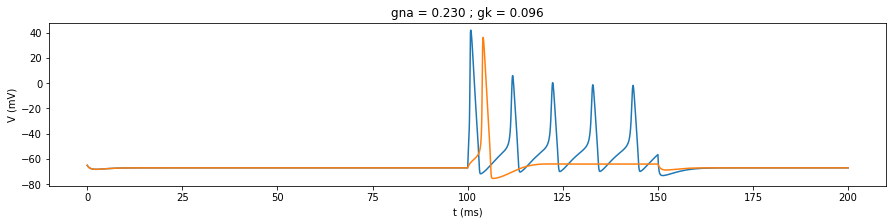

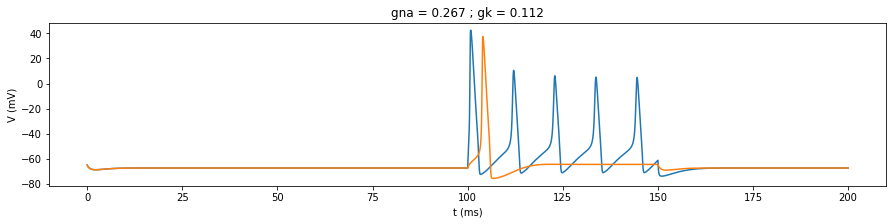

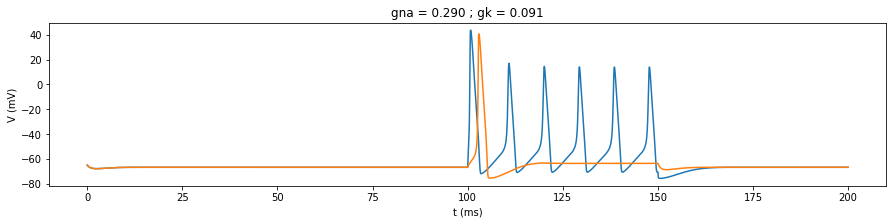

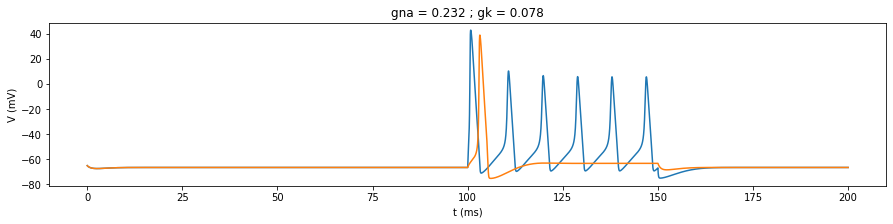

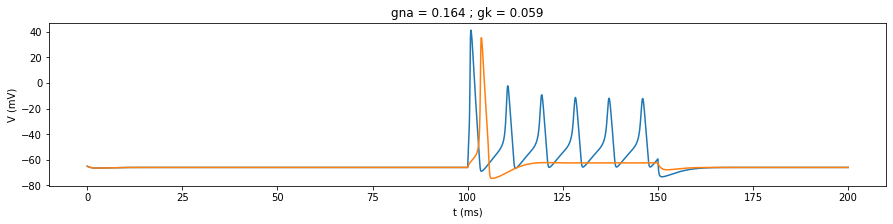

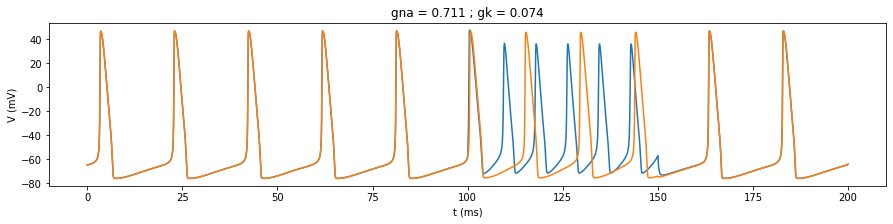

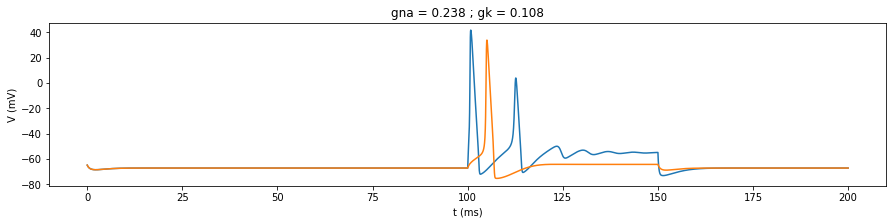

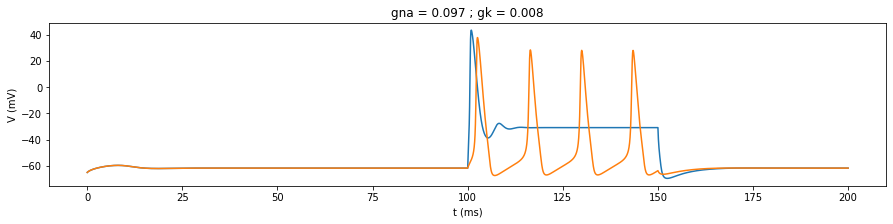

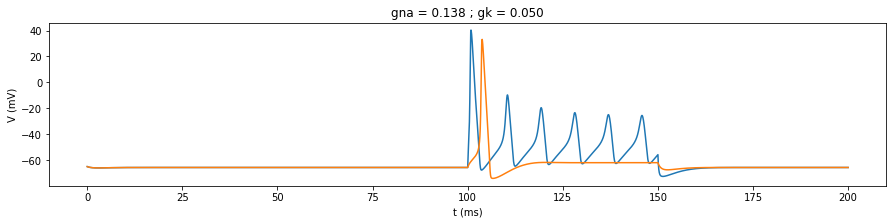

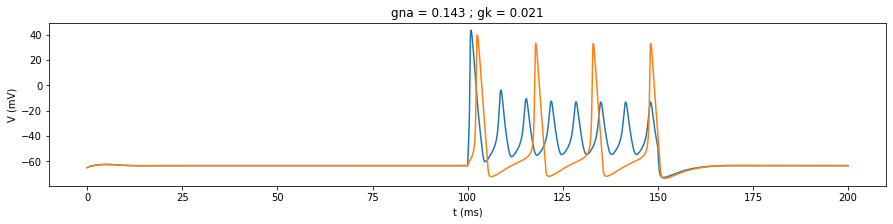

In [12]:
# RUN to test
%matplotlib inline
fit_scor_test = calculate_fitness(gs, goal_stim,debug = 1)


In [13]:
i_min = fit_scor_test.index(min(fit_scor_test));
print("Best Conductances Found: [gna,gk] =",gs[i_min])
print("Score: {:.1f} %" .format(fit_scor_test[i_min]*100))

Best Conductances Found: [gna,gk] = [0.13758870633618758, 0.05013175428770589]
Score: 0.6 %


<font size='3'> In the above example, out of the 10 trials the one shown in the cell above had the est score. Below we repeat the corresponding current clamp experiment

gna = 0.138 S/cm^2
gk  = 0.050 S/cm^2

I = 0.50 nA
AP amplitude: 97.05 mV


I = 0.05 nA
AP amplitude: 84.83 mV




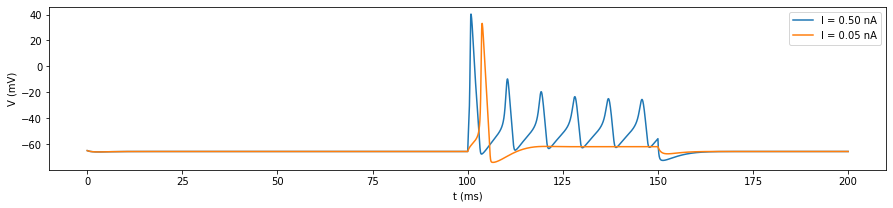

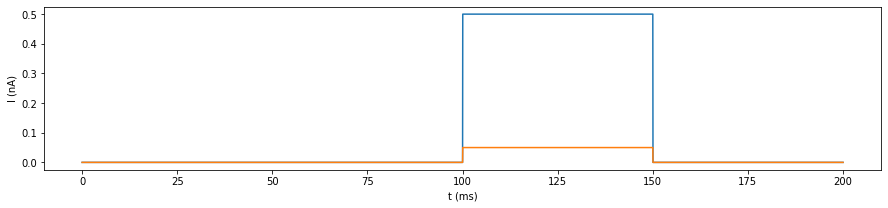

In [15]:
# Inject current steps into the soma
stim_amp = [0.5, 0.05]
gna = gs[i_min][0]
gk  = gs[i_min][1]

soma.insert('hh')
for seg in soma:
    seg.hh.gnabar = gna  # Sodium conductance in S/cm2. [0, 1]
    seg.hh.gkbar = gk  # Potassium conductance in S/cm2. [0, 1]
# Define plots
print("gna = {:.3f} S/cm^2".format(soma(0.5).hh.gnabar))
print("gk  = {:.3f} S/cm^2\n".format(soma(0.5).hh.gkbar))

fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for sa in stim_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50      # stim duration (ms)
    stim.amp = sa      # stim amplitude (nA)    
    print("I = {:.2f} nA".format(sa))
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [200]}
    feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'Spikecount'])[0] 
   
    ax1.plot(rec_t, rec_v_soma,label = "I = {:.2f} nA".format(sa))
    ax2.plot(rec_t, rec_i)
    
    print("AP amplitude: {:.2f} mV".format(feature_values['AP_amplitude'][0]))
    print('\n')
ax1.legend();

<font size='3'> The result is not too different from what we saw in the case of default values. In addition to the changes we have already performed, to improove upon this, we could increase the list of goals and stimulation amplitudes (which in essence means gather more experimental data) and use those to further optimize.